<a href="https://colab.research.google.com/github/kerdokurs/ids_project/blob/master/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS Project

TODO: Datasetidest üleliigsete andmete eemaldus (covid, ilmastik, rattaringlus datasetides jätta alles andmed vahemikus märts 01 kuni okt 31.)



In [162]:
# Check for source in the README file

import pandas as pd
#   - Use English translations for the columns
#   - Parse date as datetime
#   - Ignore the first row now that we have our own column names
#   - Parse all other columns automaticallymport matplotlib.pyplot as plt

In [163]:
# Import the weather data
# Check for source in the README file
#

weather_data = pd.read_csv(
  "data/weather_2019_2021.csv",
  names=["time", "temperature", "humidity", "pressure", "wind_speed", "wind_direction", "precipitation"],
  na_values=" ",
  parse_dates=["time"],
  skiprows=1,
)

In [164]:
# Clean the weather dataset

weather_data = weather_data.drop(columns=["pressure", "wind_direction"])

In [165]:
print(f"Dataset size: {weather_data.shape}")
print(weather_data.dtypes)
weather_data.head()

Dataset size: (266401, 5)
time             datetime64[ns]
temperature             float64
humidity                float64
wind_speed              float64
precipitation           float64
dtype: object


,time,temperature,humidity,wind_speed,precipitation
0,2019-05-01 01:00:00,7.360671,55.550208,3.354964,0.0
1,2019-05-01 01:05:00,7.293279,54.974023,3.265612,0.0
2,2019-05-01 01:10:00,7.094379,55.334567,3.135003,0.0
3,2019-05-01 01:15:00,6.909144,55.569861,2.840234,0.0
4,2019-05-01 01:20:00,6.864302,56.075395,2.822092,0.0


In [166]:
# Import bike data
bike_data_2019 = pd.read_csv("data/rattaringlus/2019.csv")
bike_data_2020 = pd.read_csv("data/rattaringlus/2020.csv")
bike_data_2021 = pd.read_csv("data/rattaringlus/2021.csv")

In [167]:
# Clean bike data by only including data in daterange may 1st to oct 31st
bike_data_2019 = bike_data_2019[(bike_data_2019["unlockedat"] >= "2019-05-01") & (bike_data_2019["unlockedat"] <= "2019-10-31")]
bike_data_2020 = bike_data_2020[(bike_data_2020["unlockedat"] >= "2020-05-01") & (bike_data_2020["unlockedat"] <= "2020-10-31")]
bike_data_2021 = bike_data_2021[(bike_data_2021["unlockedat"] >= "2021-05-01") & (bike_data_2021["unlockedat"] <= "2021-10-31")]

bike_data_2019 = bike_data_2019.append(bike_data_2020)
bike_data = bike_data_2019.append(bike_data_2021)

bike_data = bike_data.sort_values(by="unlockedat")

In [168]:
# Import covid data
covid_data_raw = pd.read_csv("data/covid.csv")

In [195]:
# Clean covid data
covid_data_raw = covid_data_raw.sort_values(by="StatisticsDate")
covid_data_2020 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2020-05-01") & (covid_data_raw["StatisticsDate"] <= "2020-10-31")]
covid_data_2021 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2021-05-01") & (covid_data_raw["StatisticsDate"] <= "2021-10-31")]
covid_data = covid_data_2020.append(covid_data_2021)

<AxesSubplot:xlabel='StatisticsDate,ResultValue'>

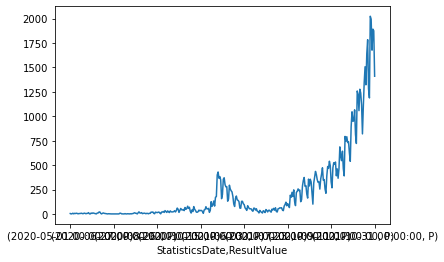

In [237]:
# Eraldada koroonaviiruse andmestikust nakatumiste lained ning panna need kuupäevad "Weekly bikeride statistics" Celli, tundub mõistlikum kui et lihtsalt piirangute põhjal teha, sest
# piirangutega on raske konkreetseid kuupäevi paika panna
# aka teeme mingi linecharti nakatumistest ja selle põhjal eraldame kuupäevad kus nakatumised tõusid, langesid ning seome selle mingi teise pildiga posteril kus võrdleme bike usage sagedust nende lainete ajal ja non-lainete aegse sagedusega
import matplotlib.pyplot as plt

covid_data["StatisticsDate"] = covid_data["StatisticsDate"].astype(np.datetime64)

covid_data = covid_data[covid_data.ResultValue == "P"]
nakatumiste_data = covid_data.groupby(["StatisticsDate"])["ResultValue"].value_counts()
covid_daterange = pd.date_range(start=min(covid_data["StatisticsDate"]), end=max(covid_data["StatisticsDate"]), freq="W")
covid_daterange

nakatumiste_data.plot.line(y="ResultValue")
# plt.plot(nakatumiste_data["StatisticsDate"], nakatumiste_data["ResultValue"])

# FIXME: X-telg on unreadable

In [160]:
# TODO: Weekly bikeride statistics piirangute ajal vs ilma piirangute ajal (2020 ja 2021)
# 2 tabelit kus on 7 bar-i (E-P) ja nendes päevades tehtud sõitude keskmine arv
# Cardo
# 0 - monday, 6 - sunday
bike_data_weekDays = bike_data
bike_data_weekDays["unlockedat"] = bike_data_weekDays["unlockedat"].astype(np.datetime64)
bike_data_weekDays["unlockedat_day"] = bike_data_weekDays["unlockedat"].dt.dayofweek


# eraldada non-piirangute ja piirangute aegsed s6idud (imo mõistlik on kokku liita need 2 lainet ning eraldi kokku liita kaks stabiilset aega ja ss võrrelda)

# leida nädalate arv antud dataframe-i daterange-is
non_laine_begin = min(bike_data_weekDays["unlockedat"]) # FIXME: see DF tuleks asendada DF-iga kus on sõidud sellisel ajal kus ei olnud koroonalainet
non_laine_end = max(bike_data_weekDays["unlockedat"])
non_laine_weeks = (non_laine_end - non_laine_begin).days / 7

laine_begin = min(bike_data_weekDays["unlockedat"]) # FIXME: see DF tuleks asendada DF-iga kus on sõidud sellisel ajal kus OLI koroonalaine
laine_end = max(bike_data_weekDays["unlockedat"])
laine_weeks = (laine_end - laine_begin).days / 7



# non_covid_rides_count = bike_data_weekDays.shape[0]
# bike_data_weekDays.groupby(["unlockedat_day"])["unlockedat_day"].count()
# bike_data_weekDays.plot.bar(x = [0, 1, 2, 3, 4, 5, 6], y = bike_data_weekDays.groupby(by="unlockedat_day").mean())
# non_covid_rides_count

# visualiseerida

99.71428571428571

In [ ]:
# TODO: Is there a difference between the statistics of the bike rides during and before covid
#eg 2019 and 2020/21

In [ ]:
# TODO: Does the last 7 day data have any impact on no of bike rides
# also take weather into account
# Agnes 